# Electric Vehicle Data Analysis and Visualization Milestone 5

First source of data, that I have collected, is from the below website which shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2

https://catalog.data.gov/dataset/electric-vehicle-population-data/resource/fa51be35-691f-45d2-9f3e-535877965e69?inner_span=True

I have created two more data one for cost of living per city, and random user API to create the random users for further analysis at the user level.

Data set from project milestore 2

In [30]:
# reading 
import pandas as pd
pd.set_option('display.max_columns', None)
df1 = pd.read_csv("ms1_output.csv")
df1.head(5)

,Unnamed: 0,County,City,Postal_Code,Model_Year,Make,Model,Electric_Range,Legislative_District,Vehicle_Location,Electric_Utility,Vehicle_Type,CAFV_Eligibility,Electric_Range_Category,VID
0,1,Skagit,Concrete,98237,2017,CHEVROLET,BOLT EV,238,39.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,BEV,Y,Mid,peggy.scherer@example.com
1,2,Snohomish,Everett,98201,2019,FORD,FUSION,26,38.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,PHEV,N,Low,dylan.white@example.com
2,8,Thurston,Lacey,98516,2020,AUDI,Q5 E,20,22.0,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,PHEV,N,Low,christine.day@example.com
3,9,Grant,Moses Lake,98837,2020,TESLA,MODEL X,293,13.0,POINT (-119.2771 47.13196),PUD NO 2 OF GRANT COUNTY,BEV,Y,High,branka.spasojevic@example.com
4,10,Thurston,Rochester,98579,2016,CHEVROLET,VOLT,53,20.0,POINT (-123.08743 46.82175),PUGET SOUND ENERGY INC,PHEV,Y,Low,mhmdmyn.sdr@example.com


In [2]:
df1.shape

(18929, 15)

Dataset from project milestone 3

In [3]:
df2 = pd.read_csv("ms3_output.csv").drop(["Unnamed: 0"], axis=1)
df2.head(5)

,index,grocery,housing,Utilities,transportation,health,misc,city,index_level,transportation_level,housing_level
0,85.0,92.4,67.4,89.0,91.9,97.7,91.6,TUMWATER,low,low,low
1,85.8,93.7,70.2,95.1,90.9,91.2,90.4,ASHFORD,low,low,low
2,87.5,93.7,71.1,98.0,95.6,100.4,91.6,FRIDAY HARBOR,low,medium,low
3,88.1,97.6,69.6,100.7,89.9,89.6,95.0,OMAK,low,low,low
4,88.6,94.6,75.6,90.3,89.8,94.6,95.1,NEWMAN LAKE,low,low,low


Dataset from Project Milestone 4

In [4]:
df3 = pd.read_csv("ms4_output.csv")
df3.head(5)

,Unnamed: 0,VID,Age,Gender
0,0,sofia.zavala@example.com,58,F
1,1,annett.christoph@example.com,72,F
2,2,leccio.duarte@example.com,40,M
3,3,purificacion.gimenez@example.com,68,F
4,4,umit.topaloglu@example.com,28,M


Creating the database and loading the 3 set of data to the database

In [5]:
## connect to database
import sqlite3
conn = sqlite3.connect("ev_database.db")

In [6]:
#Doping EMPLOYEE table if already exists
conn.execute("DROP TABLE if exists ev_data")
print("Table ev_data dropped... ")
conn.execute("DROP TABLE if exists user")
print("Table user dropped... ")
conn.execute("DROP TABLE if exists cost_of_living")
print("Table cost_of_living dropped... ")
conn.close()

Table ev_data dropped... 
Table user dropped... 
Table cost_of_living dropped... 


In [7]:
conn = sqlite3.connect("ev_database.db")

In [8]:
##push the dataframe to sql 
df1.to_sql("ev_data", conn, if_exists="replace")

18929

In [9]:
df2.to_sql("cost_of_living", conn, if_exists="replace")


435

In [10]:
df3.to_sql("user", conn, if_exists="replace")

73834

In [11]:
query = """select a.*, b.*, c.Age, c.Gender 
from ev_data a, cost_of_living b, user c
where upper(a.city)=upper(b.city) and a.vid = c.vid"""
ev_users = pd.read_sql(query, conn)


In [12]:
ev_users.head()

,index,Unnamed: 0,County,City,Postal_Code,Model_Year,Make,Model,Electric_Range,Legislative_District,...,Utilities,transportation,health,misc,city,index_level,transportation_level,housing_level,Age,Gender
0,26,142,Spokane,Spokane,99205,2019,TESLA,MODEL 3,220,3.0,...,97.3,99.4,112.3,104.0,SPOKANE,low,medium,low,53,F
1,26,142,Spokane,Spokane,99205,2019,TESLA,MODEL 3,220,3.0,...,97.3,99.4,112.3,104.0,SPOKANE,low,medium,low,53,F
2,26,142,Spokane,Spokane,99205,2019,TESLA,MODEL 3,220,3.0,...,97.3,99.4,112.3,104.0,SPOKANE,low,medium,low,53,F
3,26,142,Spokane,Spokane,99205,2019,TESLA,MODEL 3,220,3.0,...,97.3,99.4,112.3,104.0,SPOKANE,low,medium,low,53,F
4,26,142,Spokane,Spokane,99205,2019,TESLA,MODEL 3,220,3.0,...,97.3,99.4,112.3,104.0,SPOKANE,low,medium,low,53,F


In [17]:
ev_users.dtypes

index                        int64
Unnamed: 0                   int64
County                      object
City                        object
Postal_Code                  int64
Model_Year                   int64
Make                        object
Model                       object
Electric_Range               int64
Legislative_District       float64
Vehicle_Location            object
Electric_Utility            object
Vehicle_Type                object
CAFV_Eligibility            object
Electric_Range_Category     object
VID                         object
level_0                      int64
index                      float64
grocery                    float64
housing                    float64
Utilities                  float64
transportation             float64
health                     float64
misc                       float64
city                        object
index_level                 object
transportation_level        object
housing_level               object
Age                 

# Visualizaion 1

<AxesSubplot:>

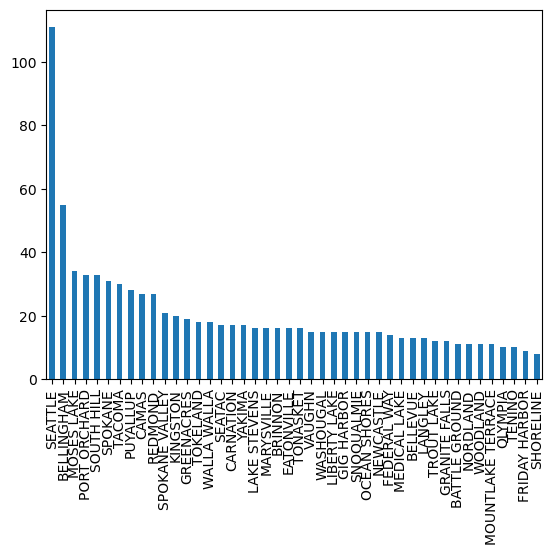

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
ev_users.where(ev_users["Make"] == 'TESLA')['city'].value_counts().plot(ax=ax, kind='bar')

Here in the vasual plot, I treid to plot the frequency distribution of Tesla brand among the cities, here as per the frequency bar plot we can say the maximum number of registraction for EV Tesla is in SEATTLE.

# Visualization 2

In [24]:
#Lets first check the frequency by make
ev_users['Make'].value_counts()

TESLA            899
BMW              628
CHEVROLET        610
FORD             536
NISSAN           428
TOYOTA           358
KIA              272
VOLVO            218
JEEP             168
HYUNDAI          157
AUDI             146
PORSCHE          116
MITSUBISHI       101
FIAT              98
CHRYSLER          84
SMART             71
MINI              46
HONDA             44
JAGUAR            42
LINCOLN           42
VOLKSWAGEN        39
CADILLAC          31
LEXUS             17
POLESTAR          17
LAND ROVER        15
MERCEDES-BENZ     11
Name: Make, dtype: int64

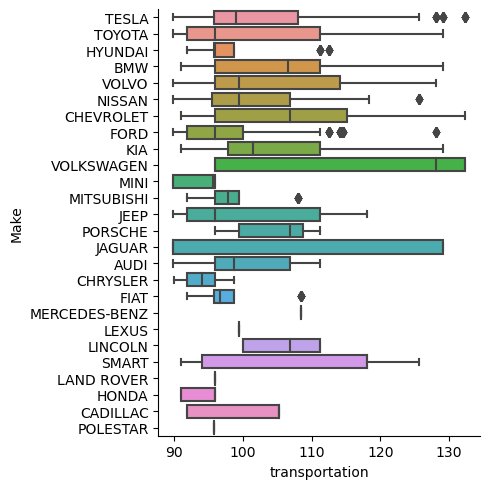

In [25]:
sns.catplot(data=ev_users, x="transportation", y="Make", kind="box")

Here I have plotted the transportation index by car make, the data is joined using random number so there analysis doesn't make real sense, but as per the diagram Mercedes and Lexus have very few records, The average transportation index is around 95 where tesla make cars are registered.

# Visualization 3

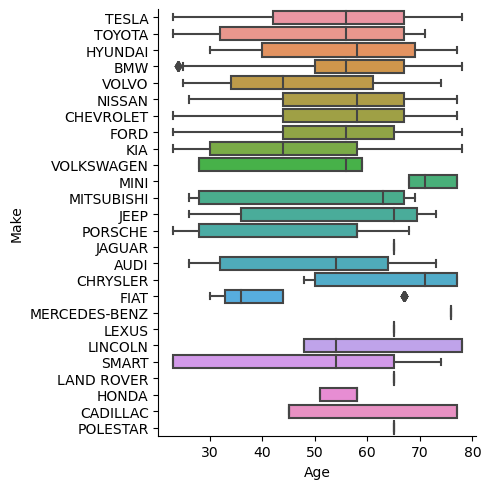

In [26]:
sns.catplot(data=ev_users, x="Age", y="Make", kind="box")

Here is the diagram for age distribution among the EV car makers, which tells for most of the EV car makes the age group is more the average, For tesla and toyota the average age who purchase EV cars of these brands are around 60. The visualtion is based on random data so it doesn't have significance compared to the real life.

# Visualization 4

In [29]:
ev_users.dtypes


index                        int64
Unnamed: 0                   int64
County                      object
City                        object
Postal_Code                  int64
Model_Year                   int64
Make                        object
Model                       object
Electric_Range               int64
Legislative_District       float64
Vehicle_Location            object
Electric_Utility            object
Vehicle_Type                object
CAFV_Eligibility            object
Electric_Range_Category     object
VID                         object
level_0                      int64
index                      float64
grocery                    float64
housing                    float64
Utilities                  float64
transportation             float64
health                     float64
misc                       float64
city                        object
index_level                 object
transportation_level        object
housing_level               object
Age                 

<AxesSubplot:xlabel='Make', ylabel='count'>

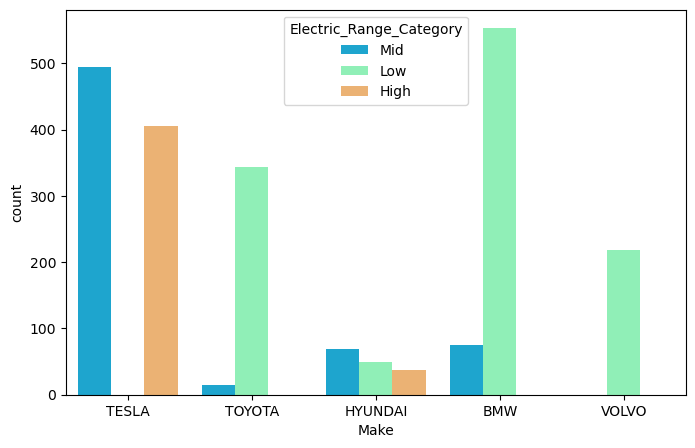

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='Make',data=ev_users.where(ev_users["Make"].isin(['TESLA','TOYOTA','HYUNDAI','BMW','VOLVO'])), palette='rainbow',hue='Electric_Range_Category')

Here in this diagram I wanted to compared between the electirc range catagory for different makes, here TESLA brand makes mid to high level electric range compared to other brands.

# Visualization 5

<AxesSubplot:xlabel='Electric_Range', ylabel='Make'>

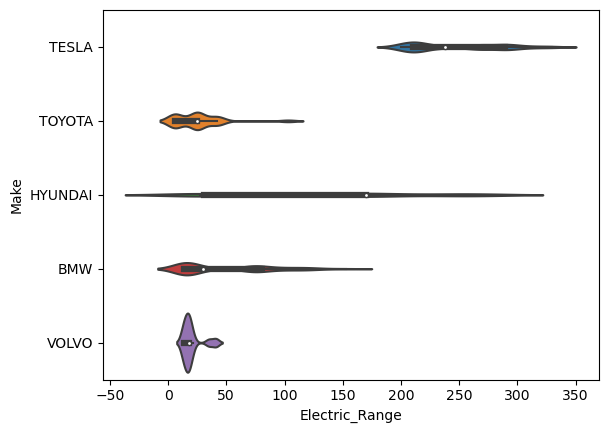

In [42]:
sns.violinplot(data=ev_users.where(ev_users["Make"].isin(['TESLA','TOYOTA','HYUNDAI','BMW','VOLVO'])), x="Electric_Range", y="Make")

Here is a violine plot for few of the EV Card Makers for theirs Electric Range, Looking at the vizualization it says Tesla is the best EV for the EV Range its ev range is quite hight between 200 to 350, whereas Volvo is having quite low EV range as per the data.